<a href="https://colab.research.google.com/github/akshayavb99/pytorch-examples/blob/main/zero-to-mastery-pytorch/01_pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The notebook contains the code used in the lesson walkthrough, as well as exercise solutions for Section 01. PyTorch Workflow Fundamentals

## Source: https://www.learnpytorch.io/01_pytorch_workflow/

### Material Walkthrough and Examples

In [11]:
#Importing libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu118'

#### Deep Learning Model Building Workflow Steps

1. Loading and preparing data of different kinds like audio, text, etc.
2. Building a model, and choosing model characteristics like loss/objective function, optimizer etc.
3. Fitting model to training data
4. Validating trained model with validation data
5. Saving trained model for future use

In [12]:
#Initialize some known params
def initializeParam(weight=0, bias=0):
  weight=weight
  bias=bias
  return (weight,bias)

#Creating data in tensors
def createData(start=0, end=1, step=0.02, weight=0, bias=0):
  X = torch.arange(start, end, step).unsqueeze(dim=1)
  y = weight *  X + bias
  #print(X[:10], y[:10])
  return X,y

#Splitting data into training, validation and/or test sets
def splitTrainingData(X, y):
  train_split = int(0.8 * len(X))
  X_train, y_train = X[:train_split], y[:train_split]
  X_test, y_test = X[train_split:], y[train_split:]
  #print(len(X_train), len(y_train), len(X_test), len(y_test))
  return (X_train,y_train),(X_test,y_test)

#Visualizing predictions made on X_test and comparing with y_test
def plot_preds(train_data, train_labels, test_data,
               test_labels, predictions=None):
  plt.figure(figsize=(10,7))

  #Plot training data
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')

  #Plot test data  
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')

  #Plot predictions
  plt.scatter(test_data,predictions,c='r',s=4,label='Predicted data')

  plt.legend(prop={"size": 14})

ValueError: ignored

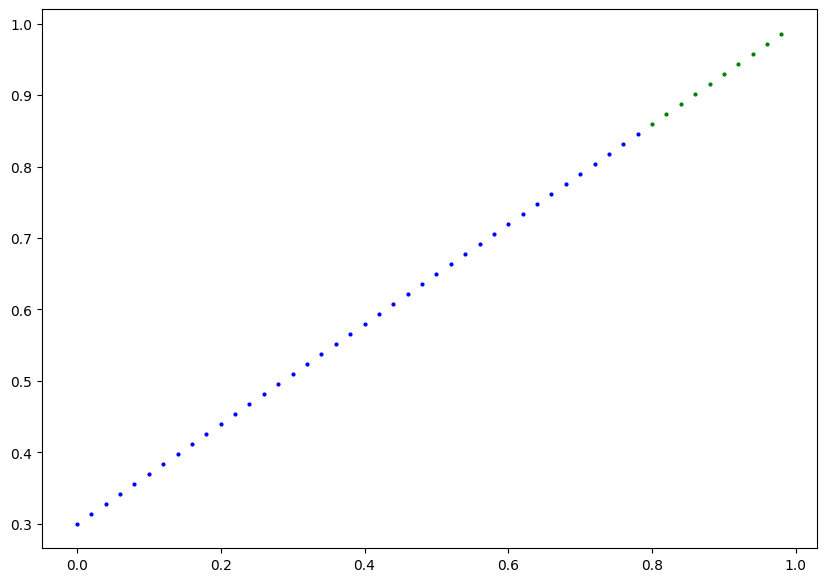

In [13]:
(weight,bias)=initializeParam(weight=0.7,bias=0.3)
X,y = createData(weight=weight,bias=bias)
(X_train, y_train), (X_test, y_test) = splitTrainingData(X,y)
plot_preds(train_data=X_train, train_labels=y_train, test_data=X_test,
           test_labels=y_test)
#Ignore error that comes here when running code - this is due to predictions=None at this point

In [14]:
#Creating LinearRegression model class
class LinearRegressionModel(nn.Module): 
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In the code above, there are some parts which are applicable for any custom neural network class built:

1. `torch.nn` is the basis for building the model class and contains all the building blocks needed to set up different parts of the Deep Learning model, like forward propagation, initializing weights and biases etc.

2. `torch.nn.Parameter` stores Tensors which are linked to the model object as parameters. Without this link, thre is no way to perform objective function optimization like gradient descent on these parameters associated with the model instance.

3. `torch.nn.Module` is the foundational class for building any neural network, and it contains many subclasses and functions which help in training, and evaulating the model. Hence, any custom class we build needs to be a child of `torch.nn.Module`, and the `__init__` function must also inherit all the functions and attributes from its parent class initializer

4. `forward()` defines how he forward propagation operations must be calculated for the associated parameters. Every subclass (like the one written above) needs to override the default `forward()` method defined in `torch.nn.Module`

In [15]:
torch.manual_seed(42)

model = LinearRegressionModel()

print('Available Initialized Model Parameters:\n')
print(list(model.parameters()))
print()
print('The current state of the model (parameters):\n')
print(model.state_dict())
print()

Available Initialized Model Parameters:

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

The current state of the model (parameters):

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])



Number of testing samples:  10
Number of predictions:  10
Predicted values:

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Difference between true test values and predicted values:

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])



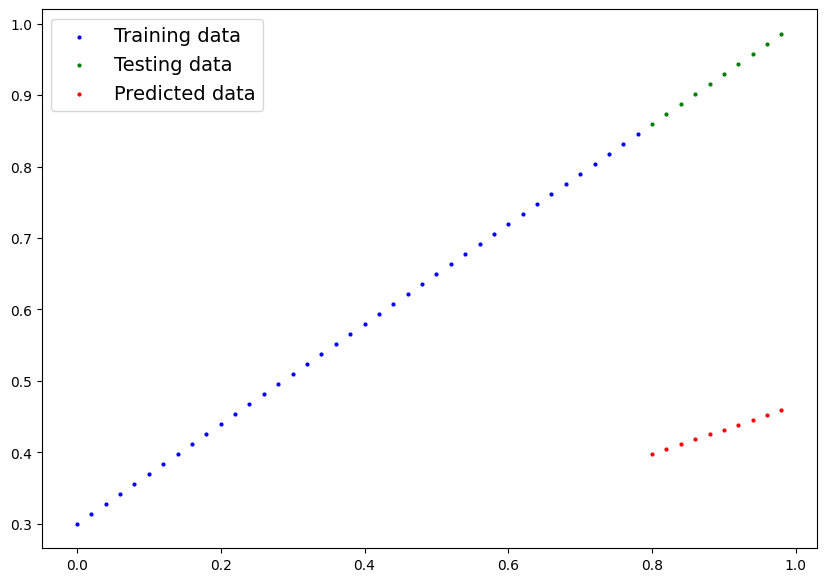

In [16]:
#Making predictions with model
with torch.inference_mode(): 
  #In older PyTorch, this could be written as with torch.no_grad(), essentially means make predictions without recalculating parameters
  y_preds = model(X_test)

print("Number of testing samples: ", len(X_test))
print("Number of predictions: ", len(y_preds))
print("Predicted values:\n")
print(y_preds)
print()

plot_preds(X_train, y_train, X_test, y_test, y_preds)

print("Difference between true test values and predicted values:\n")
print(y_test-y_preds)
print()

### Additional documentation for later reading:

1. torch.nn - https://pytorch.org/docs/stable/nn.html
2. torch.nn.Parameter - https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter
3. torch.nn.Module - https://pytorch.org/docs/stable/generated/torch.nn.Module.html
4. torch.optim - https://pytorch.org/docs/stable/optim.html
5. Some basics about OOPs using Python -  https://realpython.com/python3-object-oriented-programming/
6. PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html
7. Context Managers - https://realpython.com/python-with-statement/


Epoch:  0
Training loss:  0.31288138
Testing loss:  0.48106518

Epoch:  10
Training loss:  0.19767132
Testing loss:  0.3463552

Epoch:  20
Training loss:  0.089087255
Testing loss:  0.2172966

Epoch:  30
Training loss:  0.053148527
Testing loss:  0.14464018

Epoch:  40
Training loss:  0.045437966
Testing loss:  0.11360953

Epoch:  50
Training loss:  0.041678634
Testing loss:  0.09919948

Epoch:  60
Training loss:  0.03818933
Testing loss:  0.08886633

Epoch:  70
Training loss:  0.0347609
Testing loss:  0.080593765

Epoch:  80
Training loss:  0.031323828
Testing loss:  0.07232123

Epoch:  90
Training loss:  0.027887398
Testing loss:  0.06473556



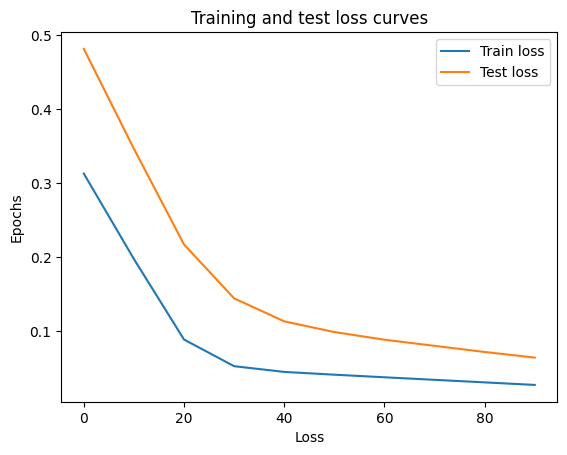

In [17]:
#Training the model
torch.manual_seed(42)

#Define loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

epochs=100

train_loss_values = []
test_loss_values = []
epoch_count = []

#Training loop
for epoch in range(epochs):
  #Training steps
  #Step 0: Put model in train mode
  model.train()

  #Step 1: Forward pass
  y_pred = model(X_train)

  #Step 2: Calculate loss
  loss = loss_fn(y_pred, y_train)

  #Step 3: Set gradient to zero for the optimizer
  optimizer.zero_grad()

  #Step 4: Backpropagation of loss
  loss.backward()

  #Update parameters tied to optimizer
  optimizer.step()

  #Testing steps
  #Step 0: Set model to evaluation mode
  model.eval()

  with torch.inference_mode():
    #Step 1: Calculate the forward propagation
    test_pred = model(X_test)

    #Step 2: Calculate loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    #Printing out results to track progress
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print("Epoch: ", epoch)
      print("Training loss: ", loss.detach().numpy())
      print("Testing loss: ", test_loss.detach().numpy())
      print()

#Plotting the model training and test loss changes with epochs
plt.plot(epoch_count,train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend();

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])


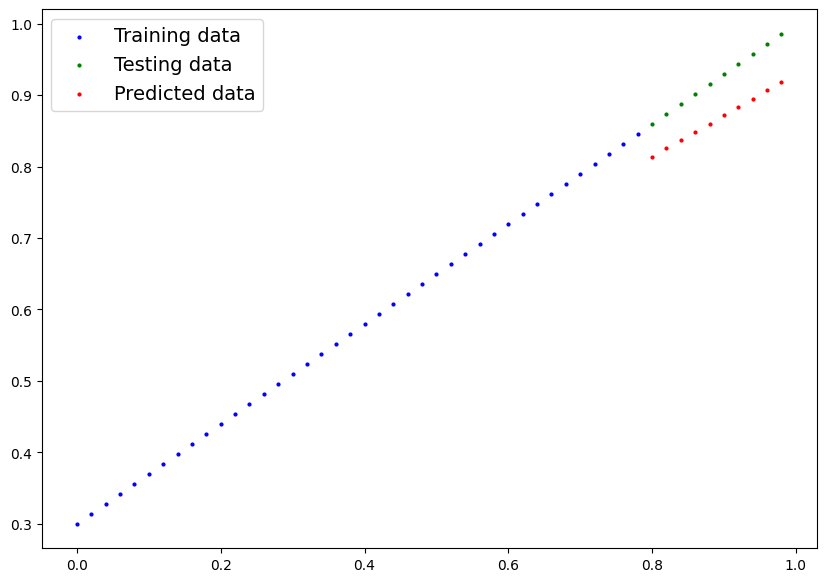

In [19]:
#Making prediction using saved model
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

print(y_preds)
plot_preds(X_train,y_train,X_test,y_test,y_preds)

In [20]:
#Saving a model

from pathlib import Path

#Step 1: Create model directory (w.r.t current working directory)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Step 2: Create model save path
MODEL_NAME = "01_test_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Step 3: Saving model state dict
print("Saving model")
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)


#Loading saved model
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

Saving model


<All keys matched successfully>

In [21]:
#Using pre-built layers
#Creating LinearRegression model class
class LinearRegressionModelV2(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [22]:
torch.manual_seed(42)
model2 = LinearRegressionModelV2()
model2,model2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [25]:
print(next(model2.parameters()).device)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model2.to(device)
print(next(model2.parameters()).device)

cpu
cpu
